In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nih-chest-xrays/data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nih-chest-xrays/data/versions/3


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
all_xray_df = pd.read_csv('/root/.cache/kagglehub/datasets/nih-chest-xrays/data/versions/3/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('/root/.cache/kagglehub/datasets/nih-chest-xrays/data/versions/3', 'images*','images', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
84667,00020843_004.png,Infiltration|Nodule,4,20843,54,M,PA,2992,2991,0.143,0.143,NaN,/root/.cache/kagglehub/datasets/nih-chest-xray...
98447,00026022_002.png,Atelectasis|Cardiomegaly|Effusion|Infiltration,2,26022,60,F,PA,2614,2991,0.143,0.143,NaN,/root/.cache/kagglehub/datasets/nih-chest-xray...
93101,00023267_000.png,Infiltration,0,23267,43,F,PA,2992,2991,0.143,0.143,NaN,/root/.cache/kagglehub/datasets/nih-chest-xray...


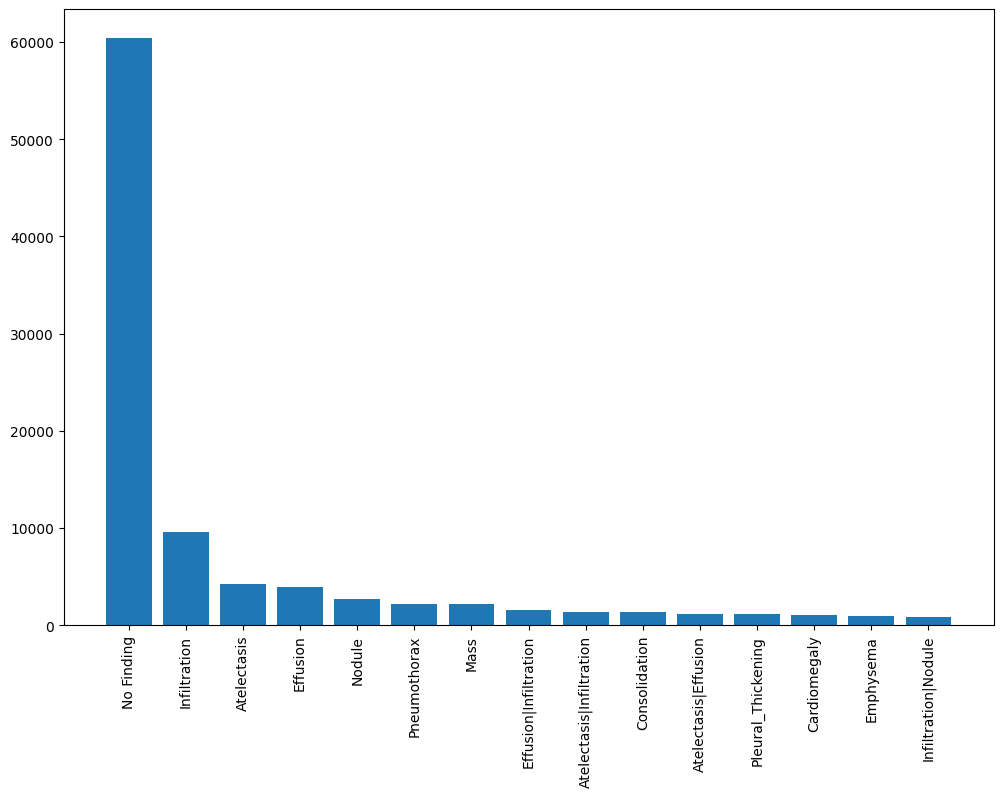

In [ ]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
9322,00002428_001.png,,1,2428,66,F,PA,2048,2500,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32296,00008458_002.png,,2,8458,43,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7694,00002015_005.png,Pleural_Thickening,5,2015,60,F,AP,2704,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


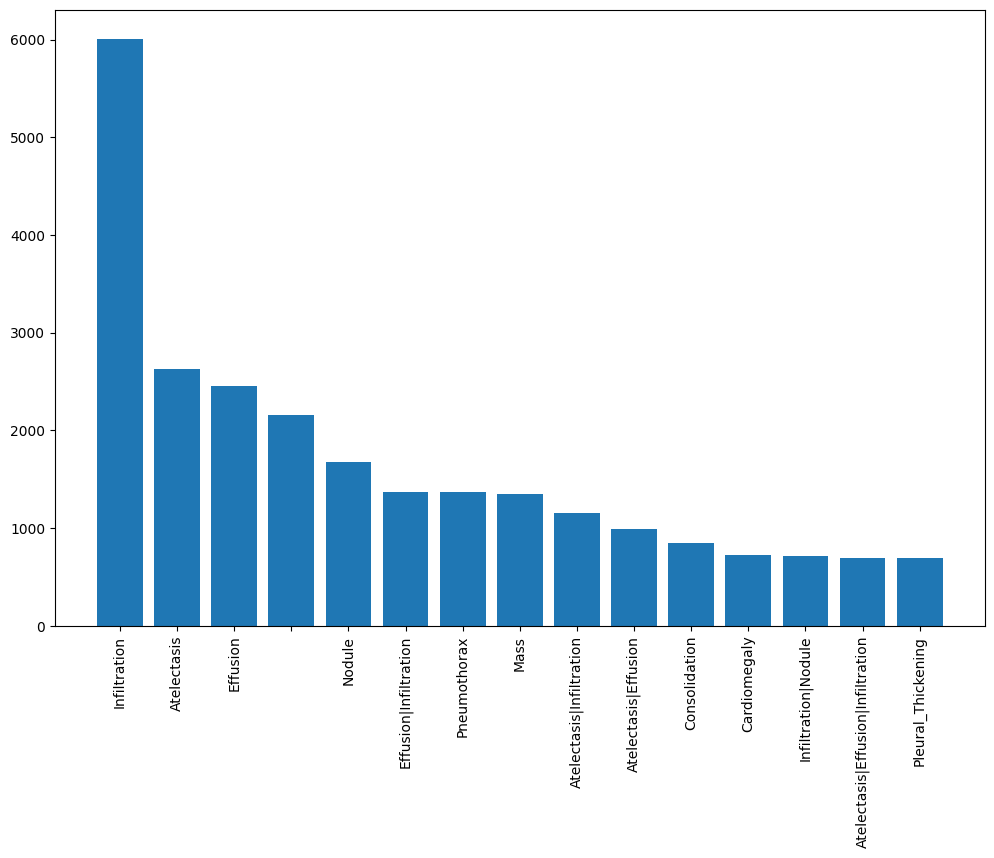

In [ ]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

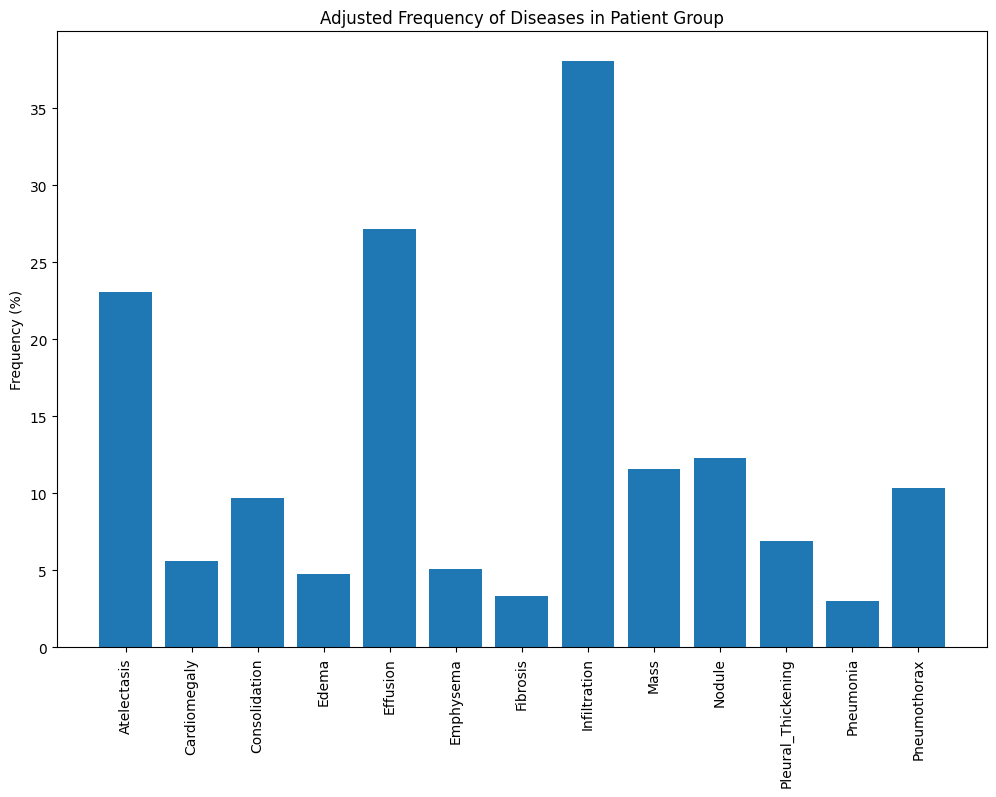

In [ ]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [ ]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)

# Splitting 'Finding Labels' into lists of labels
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

# Creating the training generator
train_gen = core_idg.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='path',
    y_col='newLabel',
    class_mode='categorical',
    classes=all_labels,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=32
)

# Creating the validation generator
valid_gen = core_idg.flow_from_dataframe(
    dataframe=valid_df,
    directory=None,
    x_col='path',
    y_col='newLabel',
    class_mode='categorical',
    classes=all_labels,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=256  # We can use much larger batches for evaluation
)

# Creating a test batch
test_X, test_Y = next(core_idg.flow_from_dataframe(
    dataframe=valid_df,
    directory=None,
    x_col='path',
    y_col='newLabel',
    class_mode='categorical',
    classes=all_labels,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=1024
))


Found 28323 validated image filenames belonging to 13 classes.
Found 9444 validated image filenames belonging to 13 classes.
Found 9444 validated image filenames belonging to 13 classes.


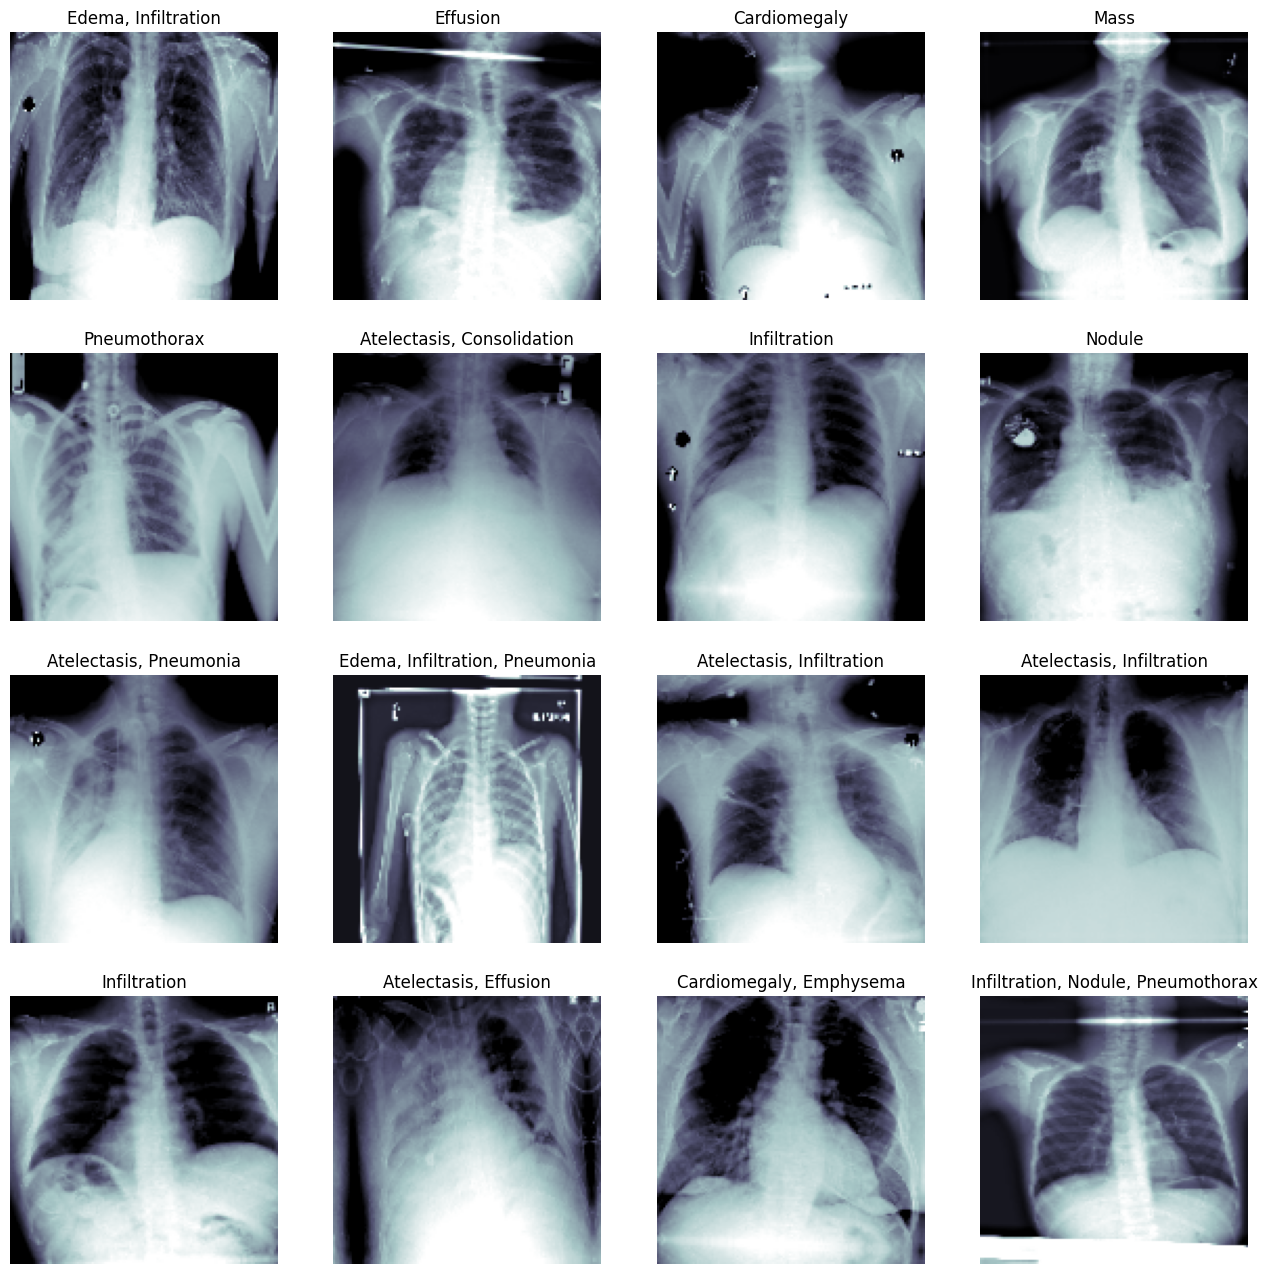

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)
                             if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           6,669 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,759,757 (14.34 MB)

 Trainable params: 3,737,869 (14.26 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}.weights.h5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
multi_disease_model.fit(train_gen,
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y),
                                  epochs = 1,
                                  callbacks = callbacks_list)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8182 - loss: 0.5165 - mae: 0.2224
Epoch 1: val_loss improved from inf to 0.40918, saving model to xray_class.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - binary_accuracy: 0.8183 - loss: 0.5161 - mae: 0.2223 - val_binary_accuracy: 0.8682 - val_loss: 0.4092 - val_mae: 0.2965


In [ ]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 22.36%
Cardiomegaly: 6.64%
Consolidation: 10.55%
Edema: 4.79%
Effusion: 27.44%
Emphysema: 5.86%
Fibrosis: 3.52%
Infiltration: 40.82%
Mass: 13.28%
Nodule: 13.48%
Pleural_Thickening: 7.71%
Pneumonia: 4.49%
Pneumothorax: 10.35%


In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


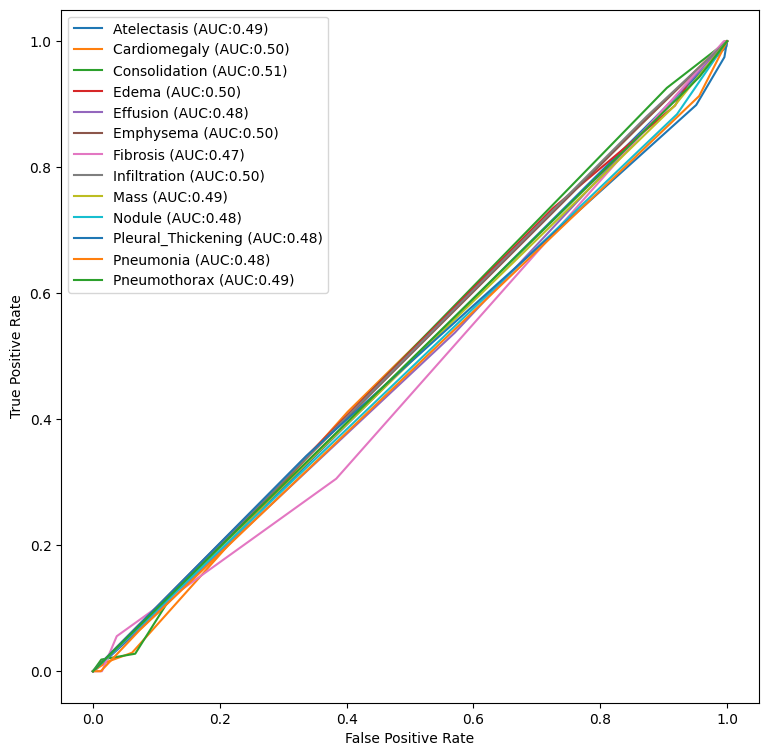

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [ ]:
multi_disease_model.fit(train_gen,
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y),
                                  epochs = 5,
                                  callbacks = callbacks_list)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8486 - loss: 0.4058 - mae: 0.2051
Epoch 1: val_loss improved from 0.40918 to 0.38364, saving model to xray_class.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - binary_accuracy: 0.8486 - loss: 0.4057 - mae: 0.2051 - val_binary_accuracy: 0.8682 - val_loss: 0.3836 - val_mae: 0.1719
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8573 - loss: 0.3726 - mae: 0.2041
Epoch 2: val_loss did not improve from 0.38364
100/100 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - binary_accuracy: 0.8573 - loss: 0.3725 - mae: 0.2041 - val_binary_accuracy: 0.8682 - val_loss: 0.3952 - val_mae: 0.1663
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - binary_accuracy: 0.8620 - loss: 0.3568 - mae: 0.2065
Epoch 3: val_loss did not improve from 0.38364
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - binary_accuracy: 0.8620 - loss: 0.3568 - mae: 0.2065 - val_binary_accuracy: 0.8682 - val_loss: 0.4247 - val_mae: 0.1585
Epoch 4/5

In [ ]:
multi_disease_model.load_weights(weight_path)

In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [ ]:
for c_label, p_count, t_count in zip(all_labels,
                                     100*np.mean(pred_Y,0),
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 22.36%, PDx: 17.54%
Cardiomegaly: Dx: 6.64%, PDx: 2.24%
Consolidation: Dx: 10.55%, PDx: 2.90%
Edema: Dx: 4.79%, PDx: 0.50%
Effusion: Dx: 27.44%, PDx: 12.81%
Emphysema: Dx: 5.86%, PDx: 4.53%
Fibrosis: Dx: 3.52%, PDx: 1.99%
Infiltration: Dx: 40.82%, PDx: 20.26%
Mass: Dx: 13.28%, PDx: 9.74%
Nodule: Dx: 13.48%, PDx: 4.39%
Pleural_Thickening: Dx: 7.71%, PDx: 7.40%
Pneumonia: Dx: 4.49%, PDx: 1.30%
Pneumothorax: Dx: 10.35%, PDx: 5.87%


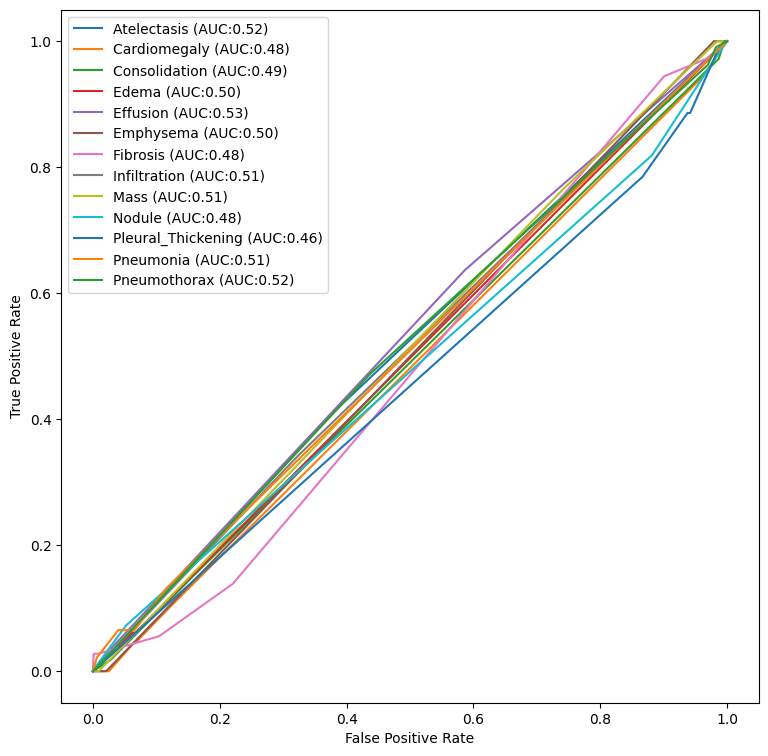

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

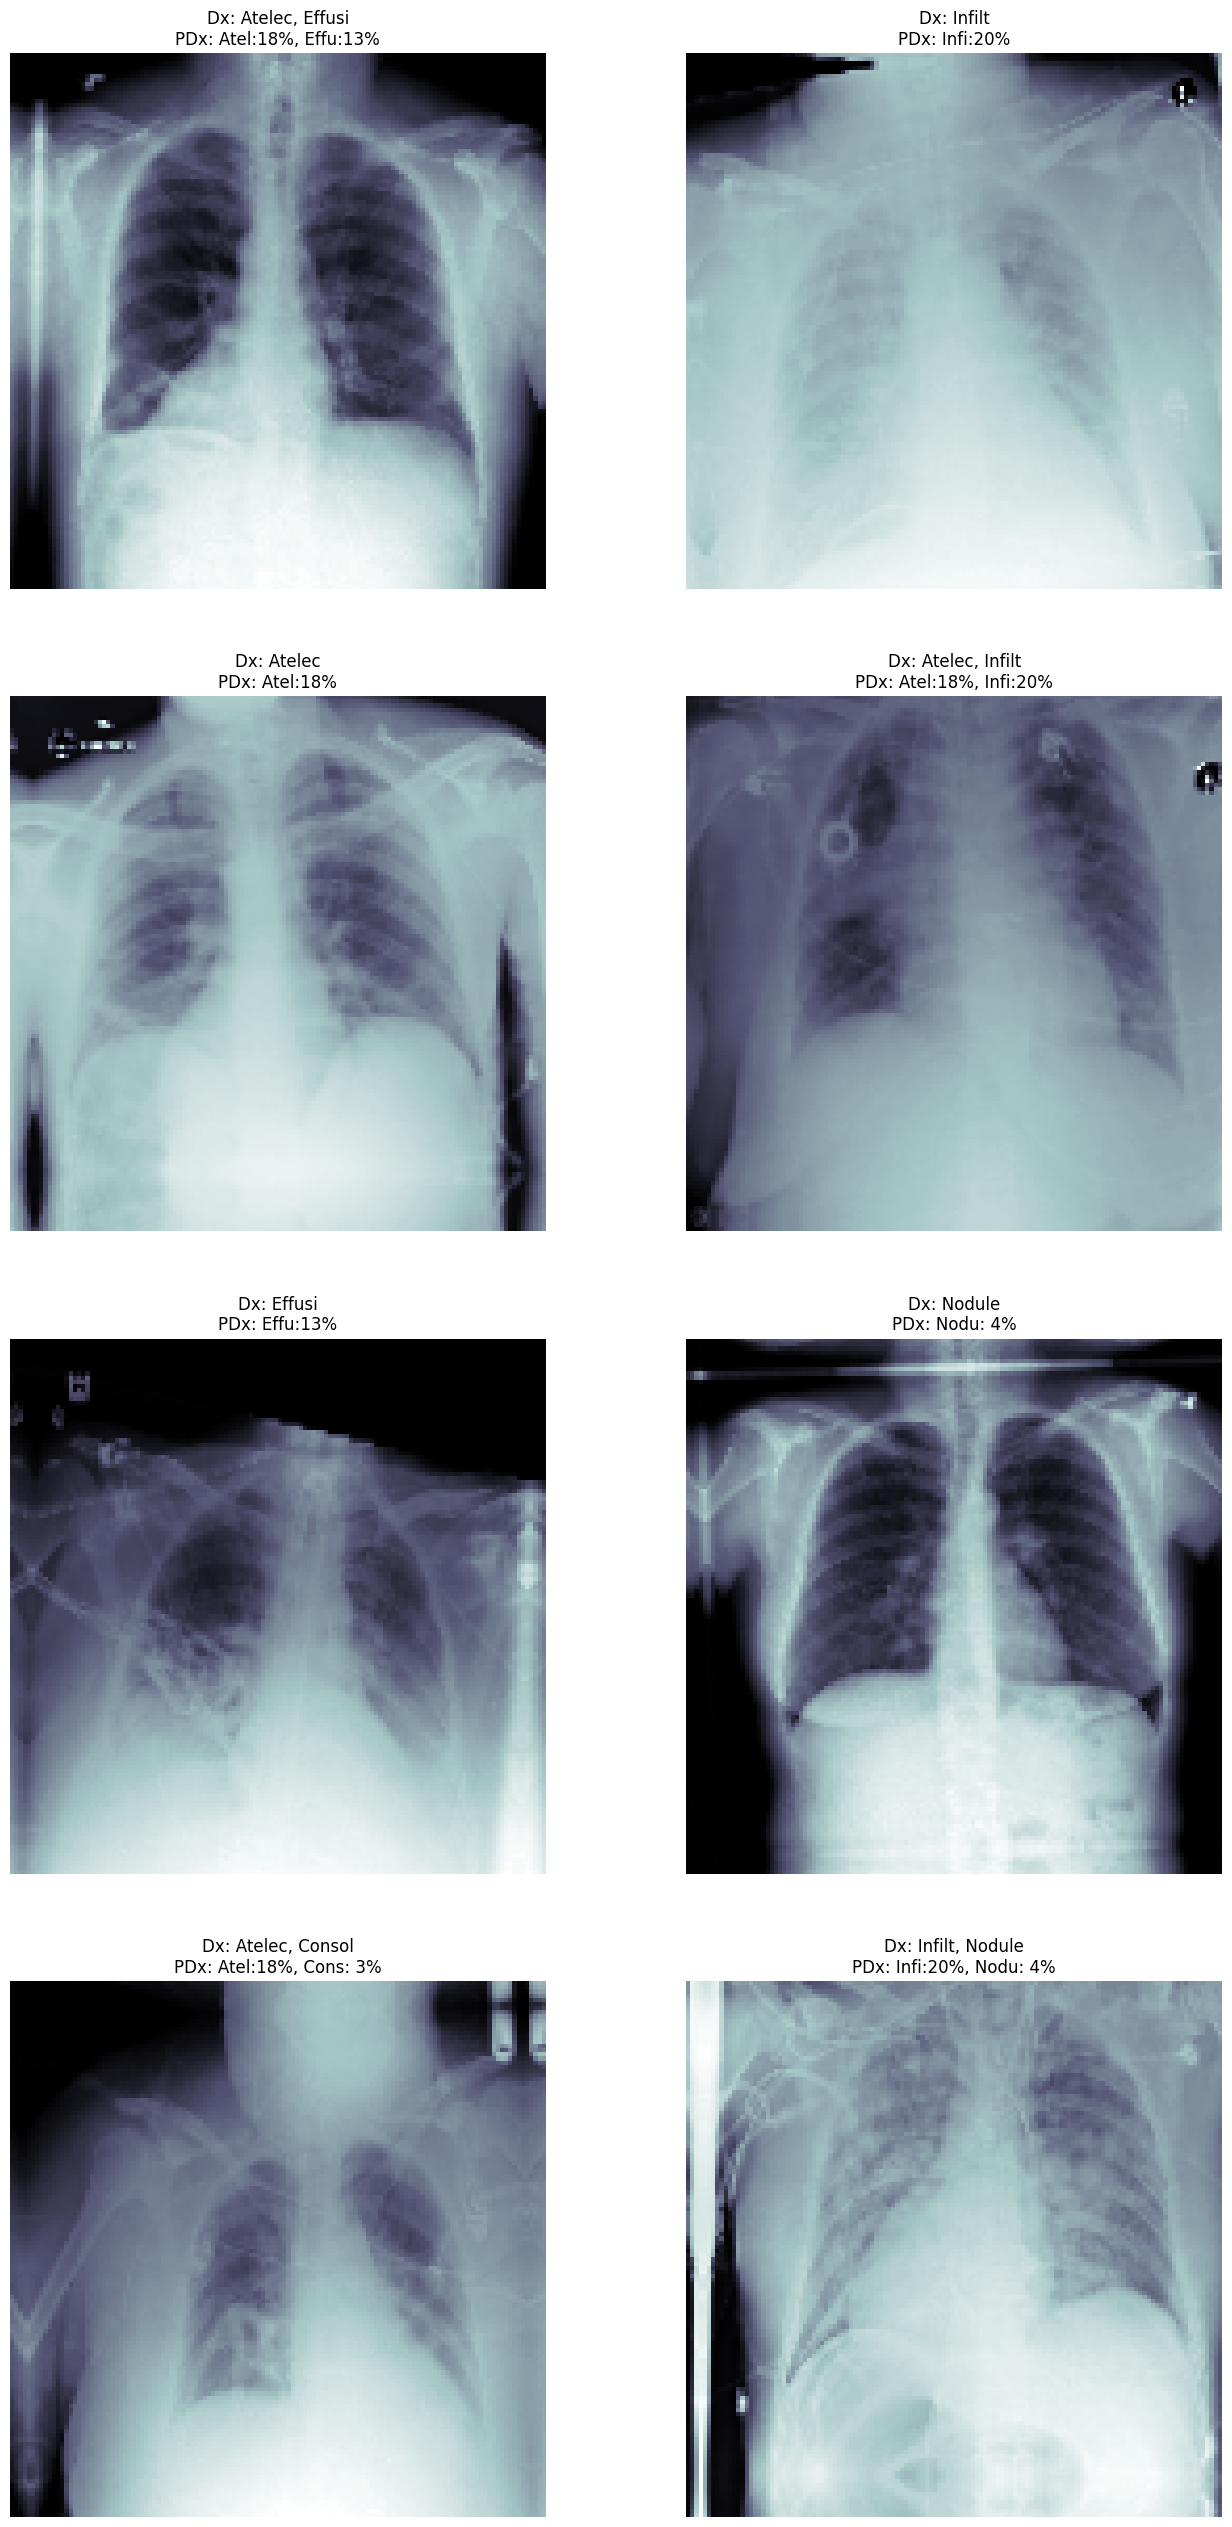

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels,
                                                                  test_Y[idx])
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels,
                                                                  test_Y[idx], pred_Y[idx])
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')